---
Visualization of data and  Color palettes of the SCL and L2 masks
---


**Description:**  
Sentinel 2 image have 10 channels, we visualized them and also perform colour band operation to make RGB images 

Additional mask are visualized using the colour palettes provided in http://rs.ipb.uni-bonn.de/data/anthroprotect/.

### Additional Comments
The data is provided in http://rs.ipb.uni-bonn.de/data/anthroprotect/.

### Author: Viswambhar Yasa

### Date: 09-01-2024

**Contact Information:**  
Email: [yasa.viswambhar@gmail.com](mailto:yasa.viswambhar@gmail.com)


In [18]:
import os
import rasterio
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
from matplotlib.colors import LinearSegmentedColormap

In [3]:
def normalize(image):
    min_val = np.percentile(image, 1)
    max_val = np.percentile(image, 99)
    normalized_img = (image - min_val) / (max_val - min_val)
    normalized_img = np.clip(normalized_img, 0, 1)
    return normalized_img

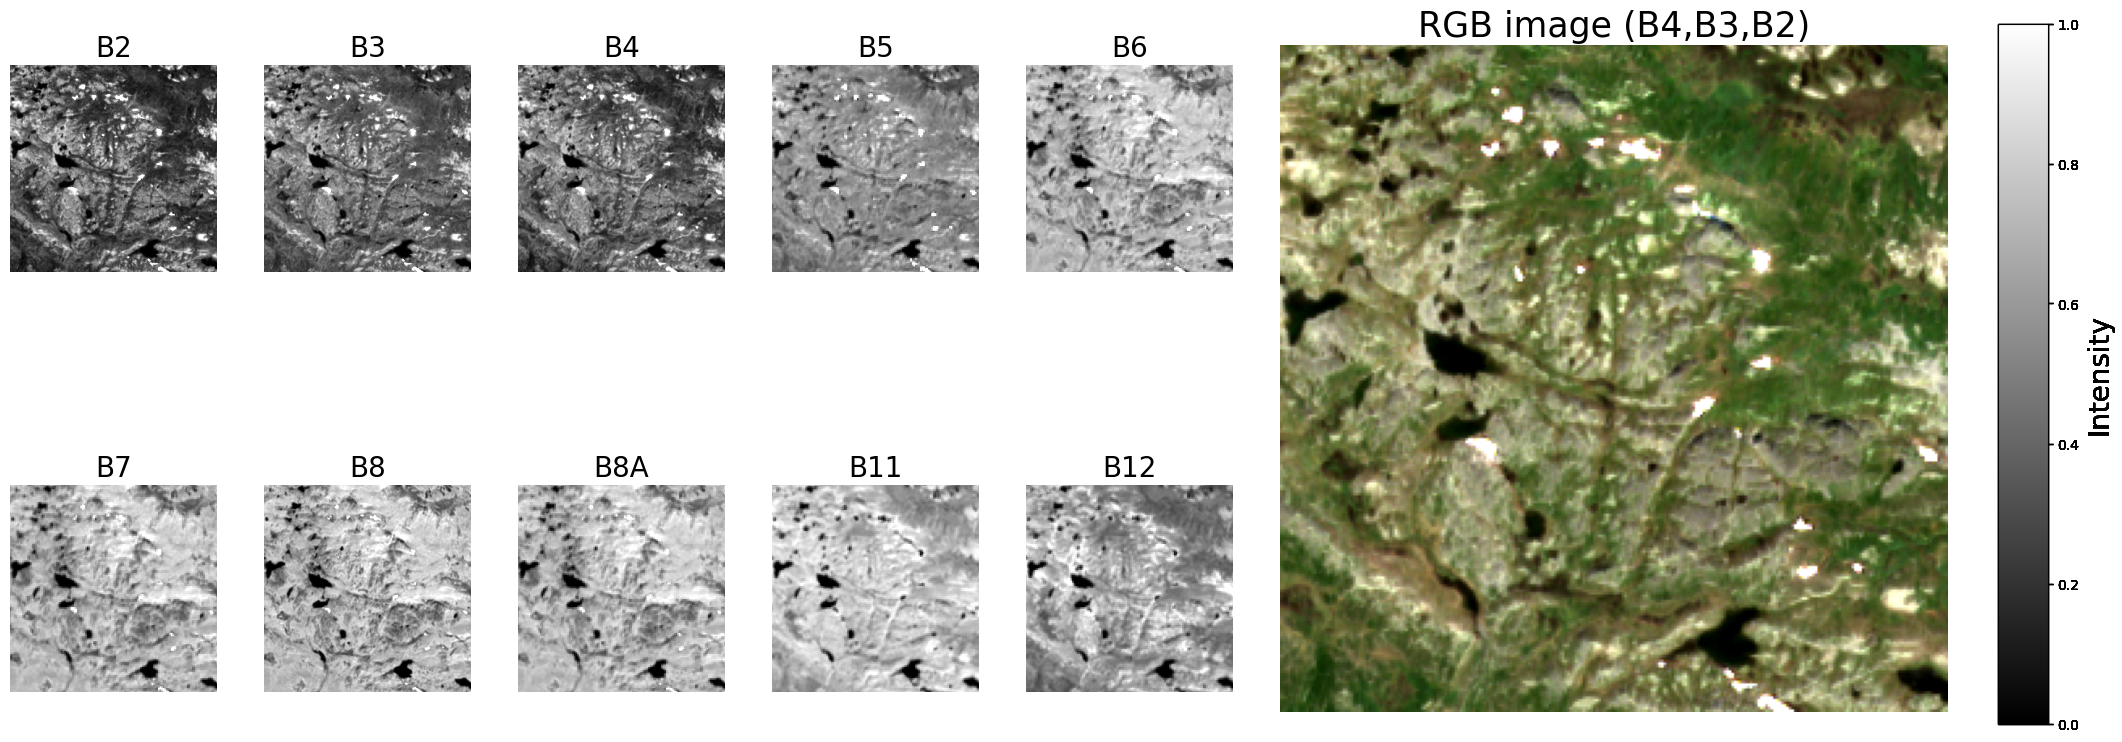

In [4]:
filepath=r"./data/wdpa-II_4658-1_66.tif"
with rasterio.open(filepath) as src:
    channeldes=src.descriptions
    image=src.read().transpose(1,2,0)
    rgb_image = normalize(np.array(src.read([3,2,1]))).transpose(1,2,0)
    argi_image = normalize(np.array(src.read([9,7,3]))).transpose(1,2,0)
    color_infra=normalize(np.array(src.read([7,3,2]))).transpose(1,2,0)

# Creating the plot
fig = plt.figure(figsize=(25, 10))
gs = GridSpec(2, 7, figure=fig,width_ratios=[1, 1, 1, 1, 1, 2, 1])
batch_index=3
# Plotting the first 10 channels
for i in range(10):
    ax = fig.add_subplot(gs[i // 5, i % 5])
    im=ax.imshow(normalize(image[ :, :,i]),cmap="gray")
    ax.set_title(channeldes[i],size=20)
    ax.axis('off')
    cax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  # [left, bottom, width, height]
    cbar = plt.colorbar(im, cax=cax)
    cbar.set_label('Intensity',size=20)

# Plotting the 11th channel that covers both rows
ax_big = fig.add_subplot(gs[:, 5:7])
ax_big.imshow(rgb_image)
ax_big.set_title('RGB image (B4,B3,B2)',size=25)
ax_big.axis('off')

plt.savefig("./figures/sentinel2data.png",bbox_inches='tight',dpi=600)

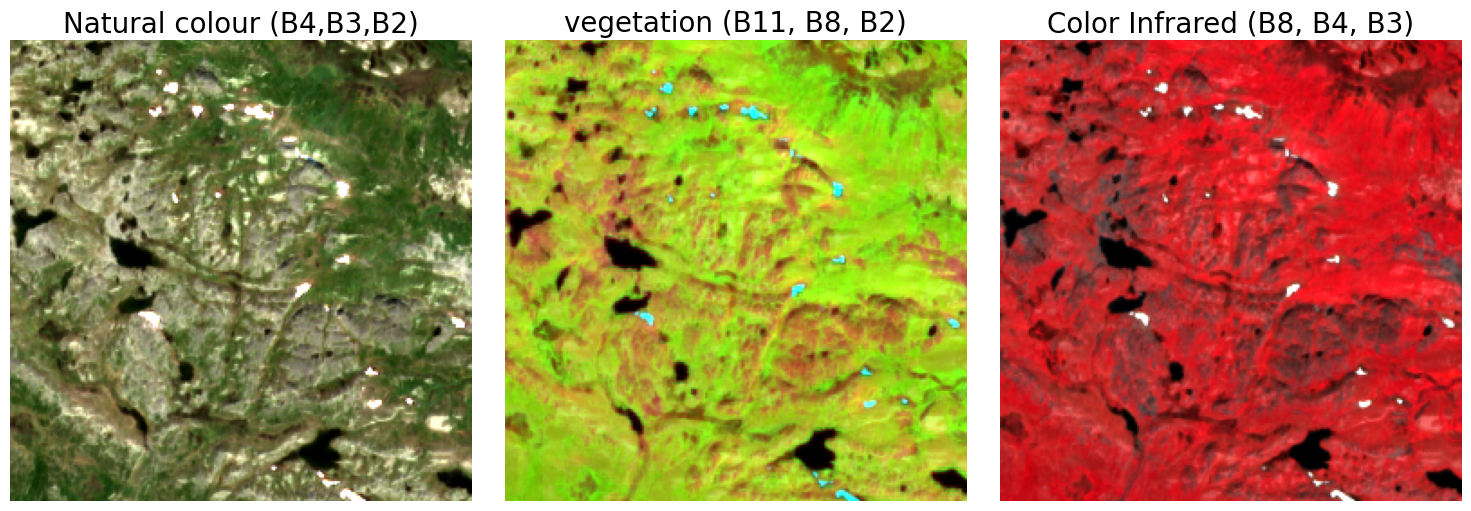

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Display the images on the subplots
axes[0].imshow(rgb_image)
axes[0].set_title('Natural colour (B4,B3,B2)',size=20)
axes[0].axis("off")

axes[1].imshow(argi_image)
axes[1].set_title('vegetation (B11, B8, B2)',size=20)
axes[1].axis("off")

axes[2].imshow(color_infra)
axes[2].set_title('Color Infrared (B8, B4, B3)',size=20)
axes[2].axis("off")
# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./figures/colourbands.png", bbox_inches='tight',dpi=600)

In [8]:
maskfilepath=r"./data/wdpa-II_4658-1_66_s2_scl.tif"

In [9]:

L2A_mask=np.array(Image.open(maskfilepath))

In [10]:
lcsmaskfilepath=r"./data/wdpa-II_4658-1_66_lcs.tif"
with rasterio.open(lcsmaskfilepath) as masktiff:
    lcsmaskimage = np.array(masktiff.read([1])).squeeze()
    labels=np.int16(np.unique(lcsmaskimage))

In [11]:
channellabels = [111, 112, 121, 122, 123, 124, 131, 132, 133, 141, 142, 211, 212, 213, 221, 222, 223, 231, 241, 242, 243, 244, 
                                  311, 312, 313, 321, 322, 323, 324, 331, 332, 333, 334, 335, 411, 412, 421, 422, 423,511, 512, 521, 522, 523]
            

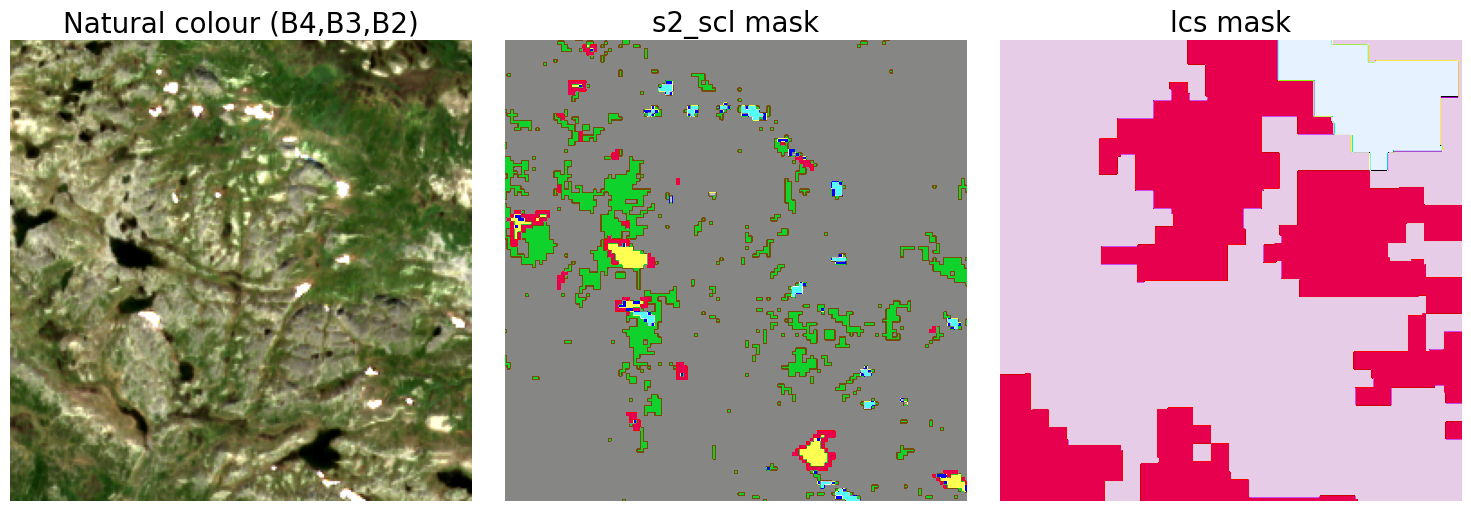

In [13]:

scl_palette = ['#E6004D','#ff0004', '#868686', '#774b0a', '#10d22c', '#ffff52', '#0000ff', '#818181', '#c0c0c0', '#f1f1f1',
               '#bac5eb',  '#52fff9']

sclcmap = LinearSegmentedColormap.from_list('scl_colormap', scl_palette, N=12)

corine_palette = ['#E6004D', '#FF0000', '#CC4DF2', '#CC0000', '#E6CCCC', '#E6CCE6', '#A600CC', '#A64DCC', '#FF4DFF',
                  '#FFA6FF', '#FFE6FF', '#FFFFA8', '#FFFF00', '#E6E600', '#E68000', '#F2A64D', '#E6A600', '#E6E64D',
                  '#FFE6A6', '#FFE64D', '#E6CC4D', '#F2CCA6', '#80FF00', '#00A600', '#4DFF00', '#CCF24D', '#A6FF80',
                  '#A6E64D', '#A6F200', '#E6E6E6', '#CCCCCC', '#CCFFCC', '#000000', '#A6E6CC', '#A6A6FF', '#4D4DFF',
                  '#CCCCFF', '#E6E6FF', '#A6A6E6', '#00CCF2', '#80F2E6', '#00FFA6', '#A6FFE6', '#E6F2FF']

corinecmap = LinearSegmentedColormap.from_list('corine_colormap', corine_palette, N=44)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Adjust figsize as needed

# Display the images on the subplots
axes[0].imshow(rgb_image)
axes[0].set_title('Natural colour (B4,B3,B2)',size=20)
axes[0].axis("off")

axes[1].imshow(L2A_mask,cmap=sclcmap)
axes[1].set_title("s2_scl mask",size=20)
axes[1].axis("off")

axes[2].imshow(lcsmaskimage,cmap=corinecmap)
axes[2].set_title('lcs mask',size=20)
axes[2].axis("off")
# Adjust layout and display the plot
plt.tight_layout()
plt.savefig("./figures/s2_scl_lcs.png", bbox_inches='tight',dpi=600)

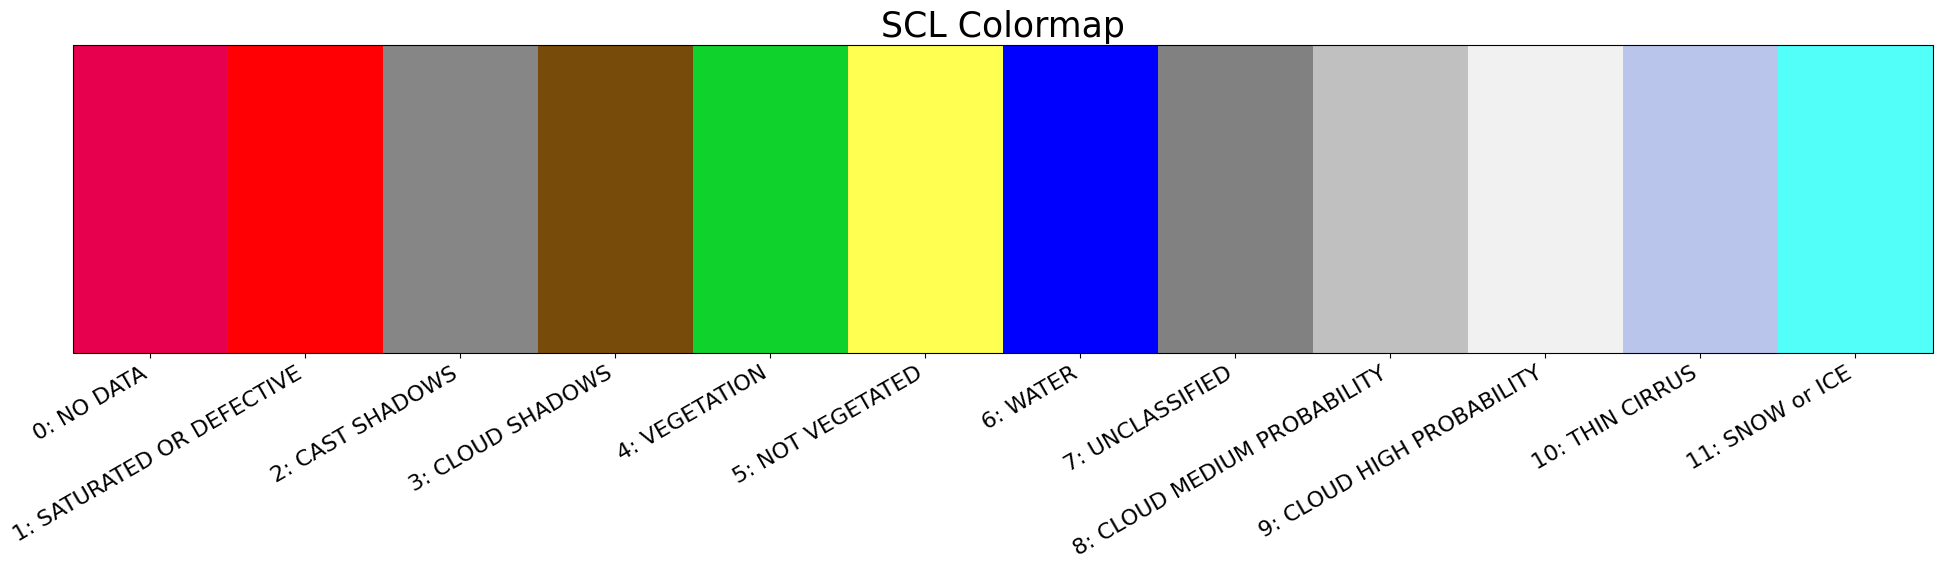

In [26]:
# obtained from 
# Provided colormap and categories
scl_palette = ['#E6004D', '#ff0004', '#868686', '#774b0a', '#10d22c', '#ffff52', '#0000ff', '#818181', '#c0c0c0', '#f1f1f1',
               '#bac5eb', '#52fff9']

mask_categories = {
    0: "NO DATA",
    1: "SATURATED OR DEFECTIVE",
    2: "CAST SHADOWS",
    3: "CLOUD SHADOWS",
    4: "VEGETATION",
    5: "NOT VEGETATED",
    6: "WATER",
    7: "UNCLASSIFIED",
    8: "CLOUD MEDIUM PROBABILITY",
    9: "CLOUD HIGH PROBABILITY",
    10: "THIN CIRRUS",
    11: "SNOW or ICE"
}

# Create a colormap using LinearSegmentedColormap
sclcmap = LinearSegmentedColormap.from_list('scl_colormap', scl_palette, N=12)

# Plotting the colormap with colorbar and categories
fig, ax = plt.subplots(figsize=(24, 4))
bounds = range(12)
cmap = plt.cm.ScalarMappable(cmap=sclcmap, norm=plt.Normalize(0, 12))
cmap.set_array([])

colorbar = plt.colorbar(cmap, ticks=bounds, orientation='horizontal', cax=ax)
plt.xticks([i + 0.5 for i in range(len(scl_palette))], [f"{i}: {category}" for i, category in mask_categories.items()], rotation=30, ha='right')
plt.yticks( visible=False)
plt.tick_params(axis='x', labelsize=16)
plt.title('SCL Colormap',size=25)
plt.savefig("./figures/s2scl_palette.png", bbox_inches='tight', dpi=600)
plt.show()

In [16]:
# CORINE land cover classes and their respective colors
# palette obtained from http://rs.ipb.uni-bonn.de/data/anthroprotect/
corine_classes = [
    111, 112, 121, 122, 123, 124, 131, 132, 133, 141, 142,
    211, 212, 213, 221, 222, 223, 231, 241, 242, 243, 244,
    311, 312, 313, 321, 322, 323, 324, 331, 332, 333, 334, 335,
    411, 412, 421, 422, 423,
    511, 512, 521, 522, 523
]
corine_labels = [
    'Continuous urban fabric', 'Discontinuous urban fabric',
    'Industrial or commercial units', 'Road and rail networks and associated land',
    'Port areas', 'Airports',
    'Mineral extraction sites', 'Dump sites', 'Construction sites',
    'Green urban areas', 'Sport and leisure facilities',
    'Non-irrigated arable land', 'Permanently irrigated land', 'Rice fields',
    'Vineyards', 'Fruit trees and berry plantations', 'Olive groves',
    'Pastures',
    'Annual crops associated with permanent crops', 'Complex cultivation patterns',
    'Land principally occupied by agriculture', 'Agro-forestry areas',
    'Broad-leaved forest', 'Coniferous forest', 'Mixed forest',
    'Natural grasslands', 'Moors and heathland', 'Sclerophyllous vegetation', 'Transitional woodland-shrub',
    'Beaches, dunes, sands', 'Bare rocks', 'Sparsely vegetated areas', 'Burnt areas', 'Glaciers and perpetual snow',
    'Inland marshes', 'Peat bogs',
    'Salt marshes', 'Salines', 'Intertidal flats',
    'Water courses', 'Water bodies',
    'Coastal lagoons', 'Estuaries', 'Sea and ocean'
]
corine_palette = [
    '#E6004D', '#FF0000', '#CC4DF2', '#CC0000', '#E6CCCC', '#E6CCE6', '#A600CC', '#A64DCC', '#FF4DFF',
    '#FFA6FF', '#FFE6FF', '#FFFFA8', '#FFFF00', '#E6E600', '#E68000', '#F2A64D', '#E6A600', '#E6E64D',
    '#FFE6A6', '#FFE64D', '#E6CC4D', '#F2CCA6', '#80FF00', '#00A600', '#4DFF00', '#CCF24D', '#A6FF80',
    '#A6E64D', '#A6F200', '#E6E6E6', '#CCCCCC', '#CCFFCC', '#000000', '#A6E6CC', '#A6A6FF', '#4D4DFF',
    '#CCCCFF', '#E6E6FF', '#A6A6E6', '#00CCF2', '#80F2E6', '#00FFA6', '#A6FFE6', '#E6F2FF'
]

In [19]:
# Convert hex colors to RGB for display
def hex_to_rgb(hex_color):
    h = hex_color.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

# Create a DataFrame for displaying the table
data = {
    "Class": corine_classes,
    "Description": corine_labels,
    "Color": [hex_to_rgb(color) for color in corine_palette]
}
df = pd.DataFrame(data)

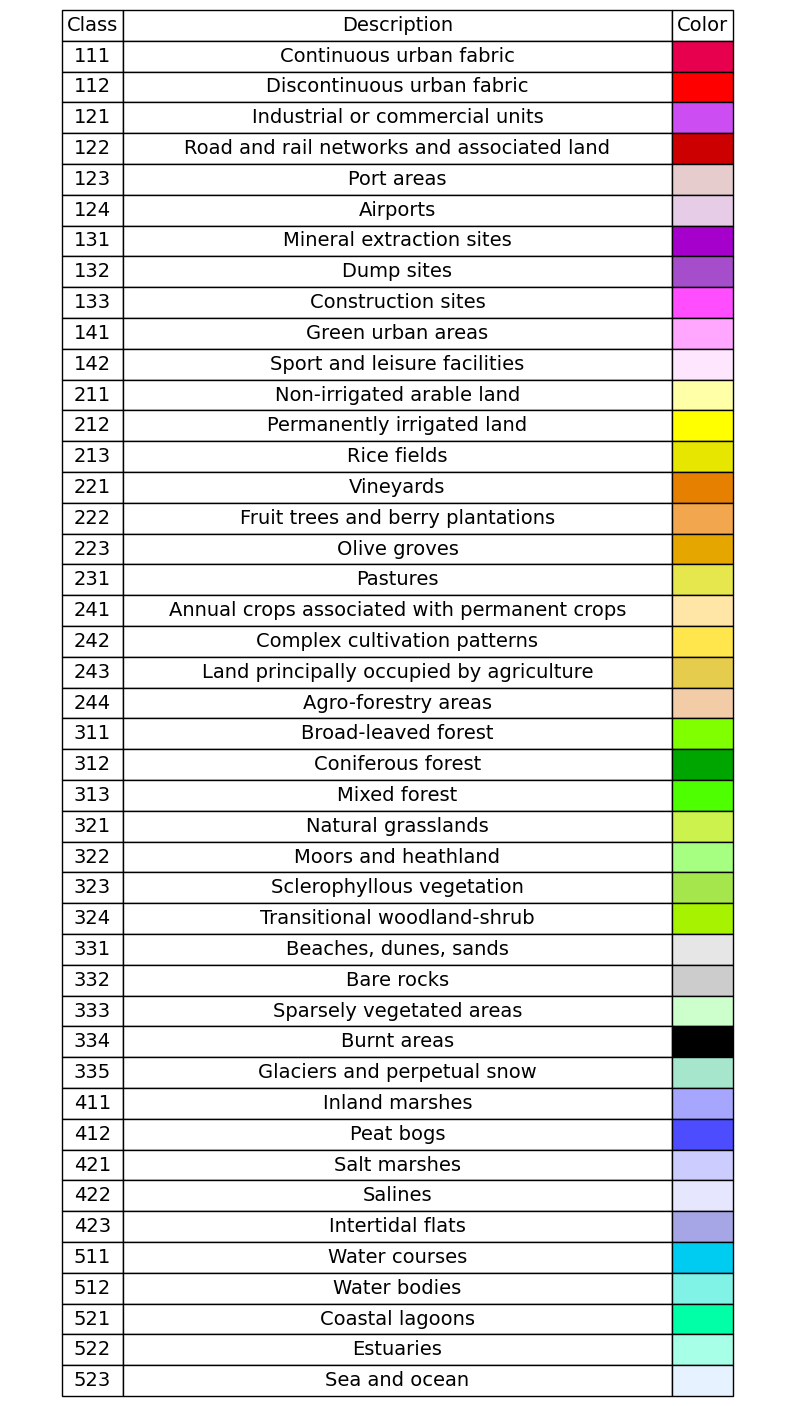

In [23]:
# Recreating the table with only colors in the 'Color' column and adjusting column sizes

# Create a larger figure
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Hide the axes
ax.axis('off')

# Define cell colors: all cells in the 'Color' column have their respective colors, others are white
colors = [["white", "white", corine_palette[i]] for i in range(len(corine_classes))]

# Create a table with adjusted column sizes and larger text, but without text in the color cells
table = ax.table(cellText=[["", "", ""] for _ in corine_classes], colLabels=df.columns, loc='center', cellLoc='center', cellColours=colors)
table.auto_set_font_size(False)
table.set_fontsize(14)  # Increase font size

# Adjust the width of the columns
table.auto_set_column_width(col=list(range(len(df.columns))))  # Automatically set width
for key, cell in table.get_celld().items():
    cell.set_height(0.04)
    if key[1] == 0:  # Class column
        cell.set_width(0.2)
    elif key[1] == 1:  # Description column
        cell.set_width(0.3)
    elif key[1] == 2:  # Color column
        cell.set_width(0.5)

# Add text to the first two columns (Class and Description)
for i, (corine_class, label) in enumerate(zip(corine_classes, corine_labels)):
    table[(i+1, 0)].get_text().set_text(corine_class)
    table[(i+1, 1)].get_text().set_text(label)

plt.savefig("./figures/lcs_palette.png", bbox_inches='tight', dpi=600)
plt.show()